In [24]:
import sys
print(sys.version_info)

import keras
print(keras.__version__)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
2.2.4


In [25]:
df_train = pd.read_csv('Samples/train2000.csv')
df_test = pd.read_csv('Samples/test2000.csv')

In [27]:
df_train

,Unnamed: 0,Configuration,Phase,Inverse temperature
0,872,[[-1 1 1 1 1 1 1 1 1 1 1 1 1 -1 -1...,1,0.433153
1,1854,[[ 1 -1 1 -1 -1 -1 1 -1 -1 -1 1 1 -1 -1 -1...,1,0.264383
2,1010,[[ 1 -1 -1 1 1 1 1 1 1 1 1 -1 1 -1 -1...,1,0.397495
3,904,[[-1 -1 1 1 1 1 1 -1 -1 -1 -1 -1 -1 -1 -1...,1,0.424326
4,556,[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1...,0,0.545132
5,1927,[[ 1 1 1 1 1 1 1 1 1 1 1 -1 -1 1 1...,1,0.256941
6,131,[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]\r\n [1 1 1 ...,0,0.835702
7,141,[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1...,0,0.825351
8,1498,[[ 1 1 -1 1 1 -1 -1 -1 1 1 1 -1 -1 -1 1...,1,0.307870
9,1071,[[-1 -1 -1 -1 1 1 1 1 1 1 1 -1 -1 -1 -1...,1,0.383538


In [28]:
df_train['Repr'] = df_train['Configuration'].apply(lambda x: np.array(json.loads(x.replace('\n',',').replace('1 ','1, '))))
df_test['Repr'] = df_test['Configuration'].apply(lambda x: np.array(json.loads(x.replace('\n',',').replace('1 ','1, '))))

1


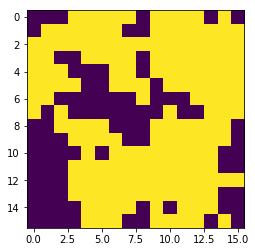

In [29]:
i = np.random.randint(0, 1000)
plt.imshow(df_train['Repr'][i])
print(df_train['Phase'][i])

In [30]:
train_lattices = np.stack(df_train['Repr'])
train_labels = df_train['Phase']
test_lattices = np.stack(df_test['Repr'])
test_labels = df_test['Phase']

In [31]:
test_lattices.shape

(1000, 16, 16)

In [32]:
train_lattices = train_lattices.reshape((-1, 16, 16, 1))
test_lattices = test_lattices.reshape((-1, 16, 16, 1))
input_shape = (16, 16, 1)

In [42]:
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.regularizers import l2

In [34]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [46]:
network = models.Sequential()
network.add(layers.InputLayer(input_shape))
network.add(layers.Flatten())
network.add(layers.Dense(100, activation='sigmoid', kernel_regularizer=l2(0.01)))
#network.add(layers.Activation('sigmoid'))
network.add(layers.Dense(2, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [47]:
network.fit(train_lattices, train_labels, epochs=125, batch_size=128)

Epoch 1/125
1000/1000 [==============================] - 2s 2ms/step - loss: 2.5098 - acc: 0.4140
Epoch 2/125
1000/1000 [==============================] - 0s 31us/step - loss: 2.0299 - acc: 0.4530
Epoch 3/125
1000/1000 [==============================] - 0s 32us/step - loss: 1.7432 - acc: 0.5420
Epoch 4/125
1000/1000 [==============================] - 0s 31us/step - loss: 1.5717 - acc: 0.6120
Epoch 5/125
1000/1000 [==============================] - 0s 32us/step - loss: 1.4575 - acc: 0.5670
Epoch 6/125
1000/1000 [==============================] - 0s 35us/step - loss: 1.3433 - acc: 0.6350
Epoch 7/125
1000/1000 [==============================] - 0s 33us/step - loss: 1.2398 - acc: 0.5670
Epoch 8/125
1000/1000 [==============================] - 0s 31us/step - loss: 1.1547 - acc: 0.6220
Epoch 9/125
1000/1000 [==============================] - 0s 35us/step - loss: 1.0810 - acc: 0.5590
Epoch 10/125
1000/1000 [==============================] - 0s 33us/step - loss: 1.0193 - acc: 0.5600
Epoch 11/1

1000/1000 [==============================] - 0s 32us/step - loss: 0.3232 - acc: 0.9570
Epoch 83/125
1000/1000 [==============================] - 0s 32us/step - loss: 0.3181 - acc: 0.9600
Epoch 84/125
1000/1000 [==============================] - 0s 35us/step - loss: 0.3134 - acc: 0.9580
Epoch 85/125
1000/1000 [==============================] - 0s 43us/step - loss: 0.3085 - acc: 0.9600
Epoch 86/125
1000/1000 [==============================] - 0s 36us/step - loss: 0.3039 - acc: 0.9590
Epoch 87/125
1000/1000 [==============================] - 0s 40us/step - loss: 0.2995 - acc: 0.9590
Epoch 88/125
1000/1000 [==============================] - 0s 36us/step - loss: 0.2956 - acc: 0.9590
Epoch 89/125
1000/1000 [==============================] - 0s 36us/step - loss: 0.2908 - acc: 0.9610
Epoch 90/125
1000/1000 [==============================] - 0s 36us/step - loss: 0.2870 - acc: 0.9580
Epoch 91/125
1000/1000 [==============================] - 0s 190us/step - loss: 0.2859 - acc: 0.9560
Epoch 92/125

In [48]:
test_loss, test_acc = network.evaluate(test_lattices, test_labels)
print('Neural network accuracy on test set:', test_acc)

1000/1000 [==============================] - 0s 369us/step
Neural network accuracy on test set: 0.951


In [53]:
#for tSNE
train_lattices_tsne = np.stack(df_train['Repr']).reshape((-1, 16*16))
test_lattices_tsne = np.stack(df_test['Repr']).reshape((-1, 16*16))
train_labels_tsne = df_train['Phase']

In [51]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=33)

X_tsne = tsne.fit_transform(train_lattices_tsne)

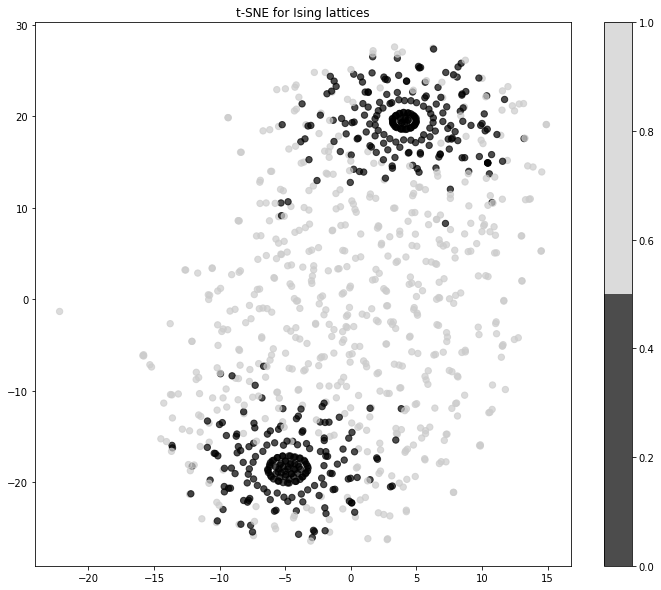

In [54]:
# Visualize
plt.figure(figsize=(12,10))

plt.scatter(
    X_tsne[:,0],
    X_tsne[:,1],
    c=train_labels_tsne,
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap('nipy_spectral', 2),
)

plt.colorbar();  # add colorbar with mapping: color --> class
plt.title('t-SNE for Ising lattices');